#**Text Classification**

## Import Library

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

## Read Dataset

In [65]:
df = pd.read_csv('/content/dataset (4).csv')
df.fillna(' ')
df.shape
df.head()

,No.,Title,Text,Label
0,1,The Brazilian doctor offering bogus Covid reme...,A Brazilian state representative and doctor is...,Fake
1,2,France puzzled by mystery anti-Pfizer campaign...,Several French social media influencers say th...,Fake
2,3,Covid-19: YouTube launches vaccination ad camp...,YouTube has launched a multi-million-pound adv...,Fake
3,4,Israel-Palestinian conflict: False and mislead...,As the Israel-Palestinian conflict has escalat...,Fake
4,5,The misinformation bubble threatening Brazil's...,False information from the mouths of politicia...,Fake


In [66]:
labels = df.Label
labels.head()

0    Fake
1    Fake
2    Fake
3    Fake
4    Fake
Name: Label, dtype: object

## Split Dataset

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df['Text'], labels, test_size=0.2, random_state=69)

## Initialize TF-IDF Vectorizer

In [68]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')

# Fit, and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

## Initialize Passive Aggresive Classifier

In [69]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

# Predict on the test set
y_pred = pac.predict(tfidf_test)

## Evaluation/Accuracy


In [70]:
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 80.0%


In [71]:
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[ 7  7]
 [ 1 25]]


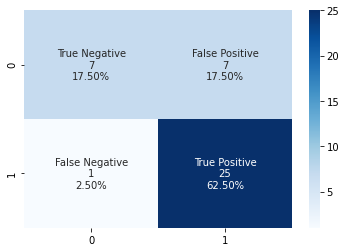

In [72]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')